In [1]:
import math
import pandas as pd

# Dataset
data = [
    ['Sunny', False, 'No'],
    ['Sunny', True, 'No'],
    ['Overcast', False, 'Yes'],
    ['Overcast', True, 'No'],
    ['Rainy', False, 'Yes'],
    ['Rainy', True, 'Yes']
]

df = pd.DataFrame(data, columns=['Outlook', 'Windy', 'Play'])

# Entropy calculation
def entropy(target_col):
    values = target_col.value_counts(normalize=True)
    return -sum(p * math.log2(p) for p in values)

# Information Gain
def info_gain(df, feature, target='Play'):
    total_entropy = entropy(df[target])
    values = df[feature].unique()
    
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        prob = len(subset) / len(df)
        weighted_entropy += prob * entropy(subset[target])
    
    return total_entropy - weighted_entropy

# Compute gains
gain_outlook = info_gain(df, 'Outlook')
gain_windy = info_gain(df, 'Windy')

print("Information Gain for Outlook:", gain_outlook)
print("Information Gain for Windy:", gain_windy)

best_feature = 'Outlook' if gain_outlook > gain_windy else 'Windy'
print("Root node based on max info gain:", best_feature)


Information Gain for Outlook: 0.6666666666666667
Information Gain for Windy: 0.08170416594551044
Root node based on max info gain: Outlook


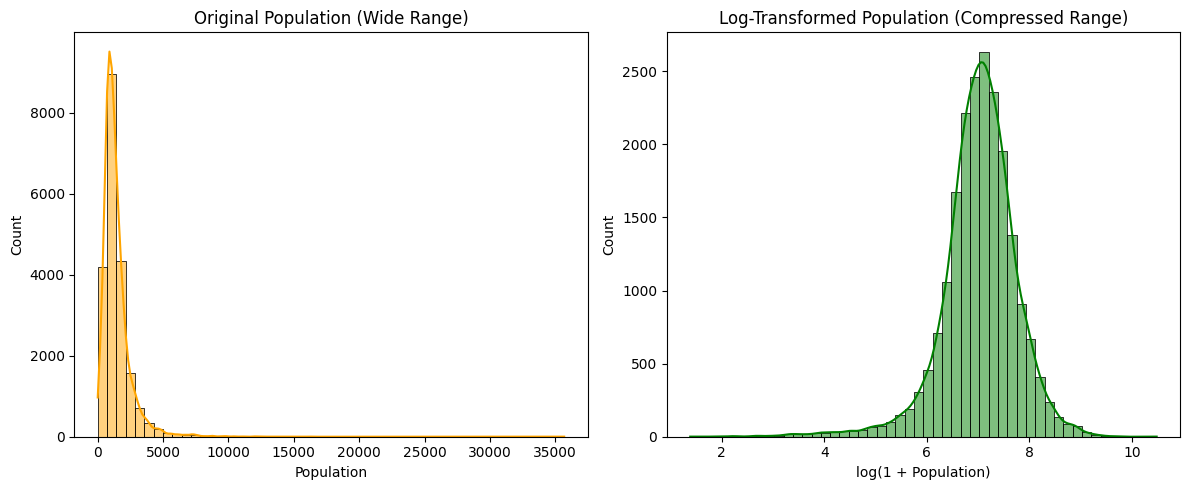

Original Range:  3.0 to 35682.0
Transformed Range:  1.39 to 10.48


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: California Housing data population
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Step 1: Extract the Population column
population = X['Population']

# Step 2: Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True, color='orange')
plt.title("Original Population (Wide Range)")
plt.xlabel("Population")
plt.ylabel("Count")

# Step 3: Apply log transformation
log_population = np.log1p(population)  # log(1 + x)

# Step 4: Plot log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(log_population, bins=50, kde=True, color='green')
plt.title("Log-Transformed Population (Compressed Range)")
plt.xlabel("log(1 + Population)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Step 5: Show range before and after
print("Original Range: ", population.min(), "to", population.max())
print("Transformed Range: ", round(log_population.min(), 2), "to", round(log_population.max(), 2))


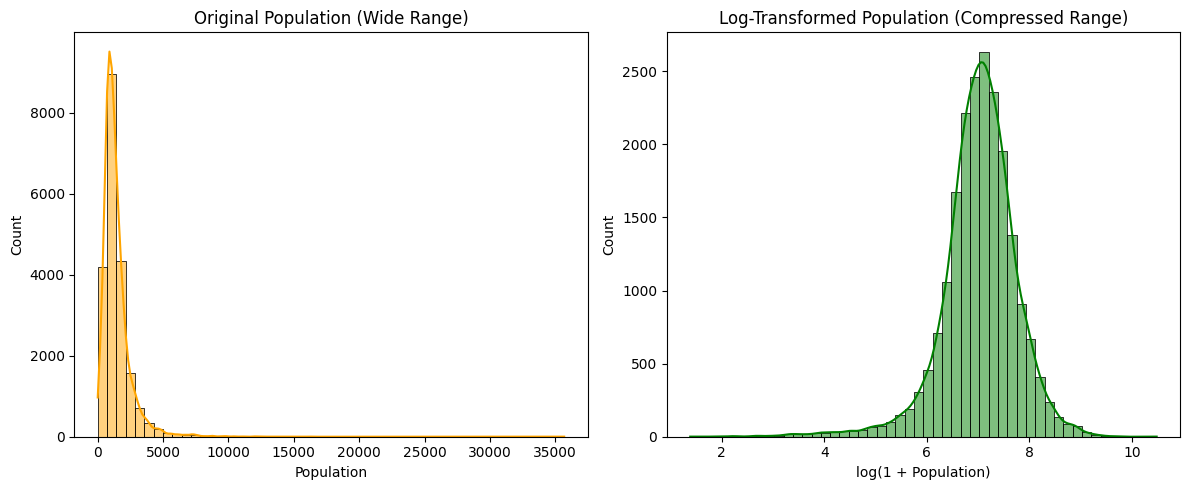

Original Range:  3.0 to 35682.0
Transformed Range:  1.39 to 10.48


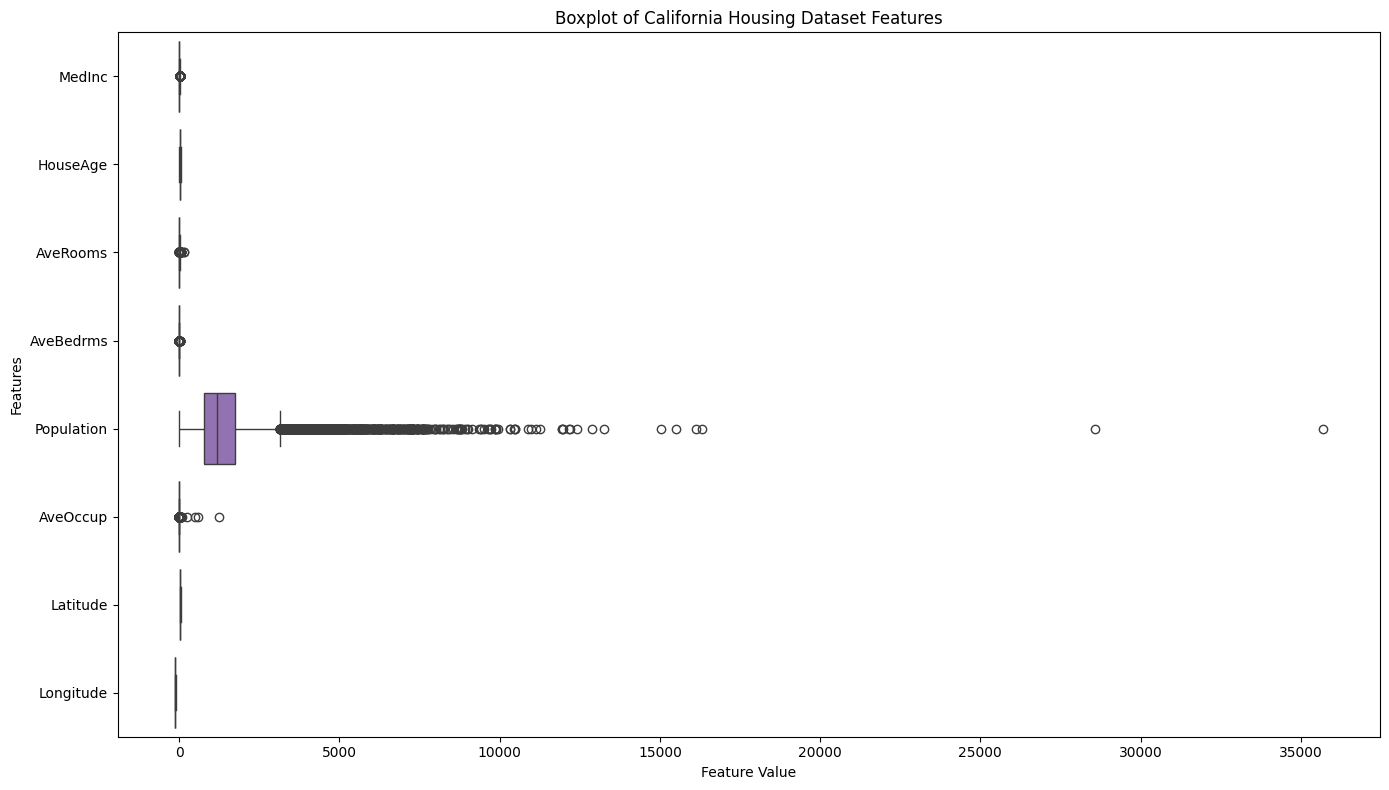

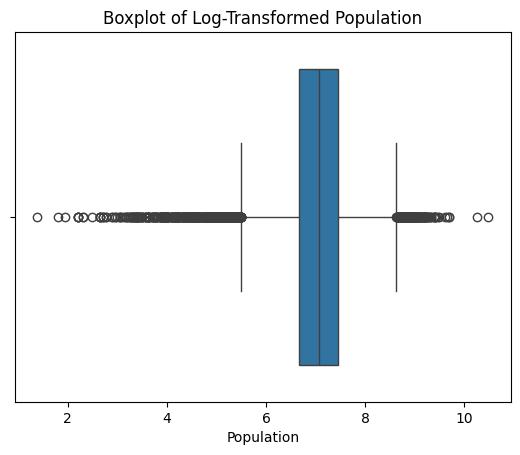

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Step 1: Extract the Population column
population = X['Population']

# Step 2: Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True, color='orange')
plt.title("Original Population (Wide Range)")
plt.xlabel("Population")
plt.ylabel("Count")

# Step 3: Apply log transformation
log_population = np.log1p(population)  # log(1 + x)

# Step 4: Plot log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(log_population, bins=50, kde=True, color='green')
plt.title("Log-Transformed Population (Compressed Range)")
plt.xlabel("log(1 + Population)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Step 5: Show range before and after
print("Original Range: ", population.min(), "to", population.max())
print("Transformed Range: ", round(log_population.min(), 2), "to", round(log_population.max(), 2))

plt.figure(figsize=(14, 8))
sns.boxplot(data=X, orient='h')  # Horizontal boxplot

plt.title("Boxplot of California Housing Dataset Features")
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#X['Log_Population'] = np.log1p(X['Population'])  # log(1 + x)

sns.boxplot(x=log_population)
plt.title("Boxplot of Log-Transformed Population")
plt.show()




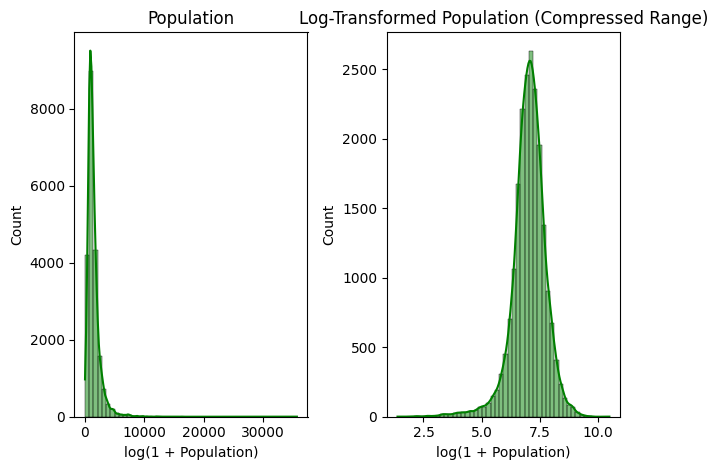

Mean Squared Error: 0.5245146178314735
R² Score: 0.5997321244428706


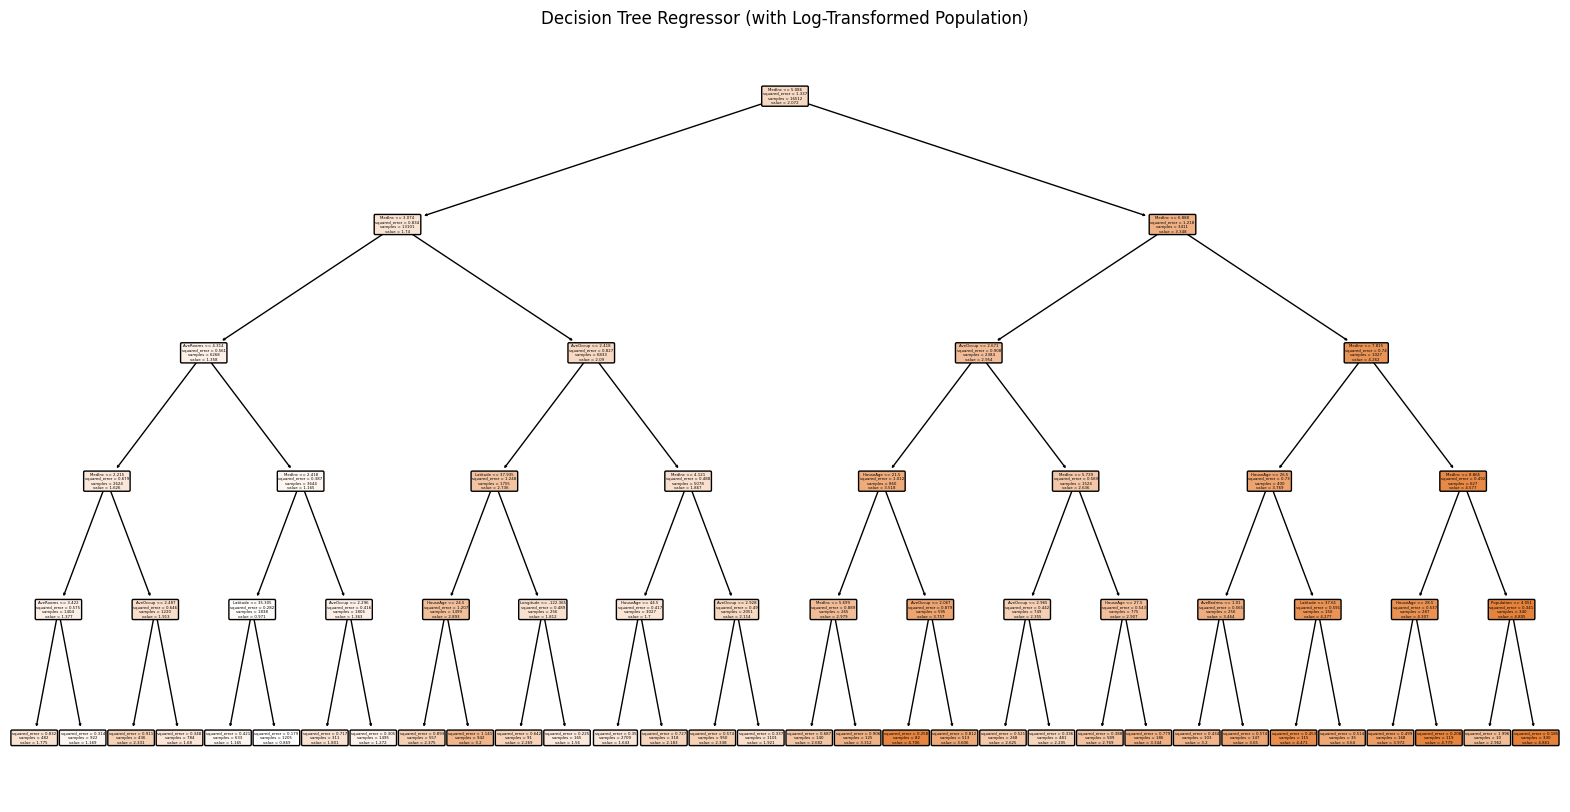

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
plt.subplot(1, 2, 1)
sns.histplot(X['Population'], bins=50, kde=True, color='green')
plt.title("Population")
plt.xlabel("log(1 + Population)")
plt.ylabel("Count")
# Step 1: Extract and transform 'Population'

X['Population'] = np.log1p(X['Population'])  # Apply log(1 + x)
plt.subplot(1, 2, 2)
sns.histplot(X['Population'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Population (Compressed Range)")
plt.xlabel("log(1 + Population)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor (with Log-Transformed Population)")
plt.show()


Accuracy: 1.0


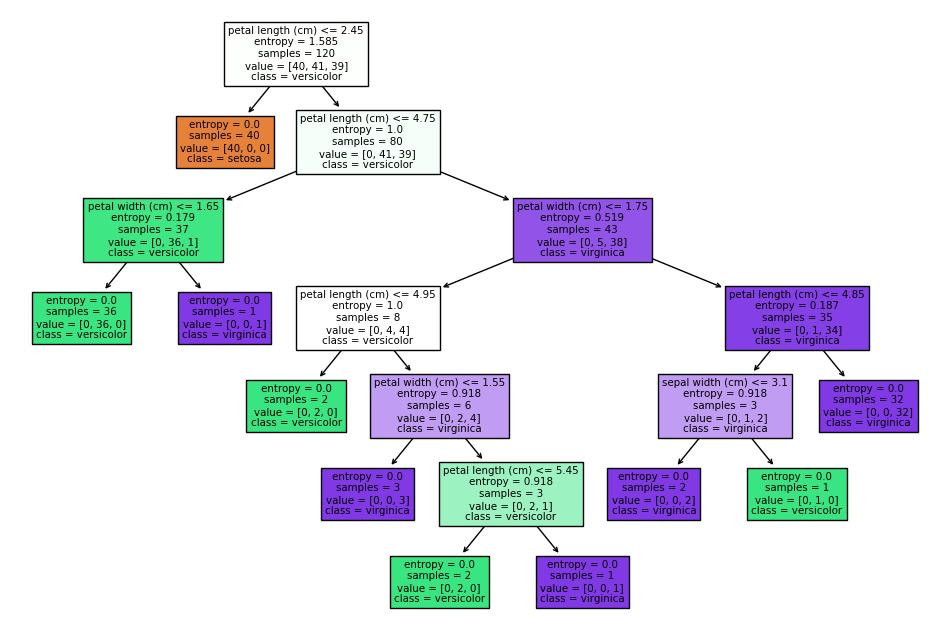

Predicted species: setosa


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Predict new flower
new_sample = [[5.1, 3.5, 1.4, 0.2]]
pred = clf.predict(new_sample)
print("Predicted species:", iris.target_names[pred[0]])
